In [1]:
!pip install tabulate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from tabulate import tabulate
import time
%matplotlib inline

In [3]:
np.set_printoptions(precision=3, suppress=True)

In [4]:
f = [.75, .25]
g = [0., .6,  0., .4]
h = np.convolve(f,g)
hf = fftconvolve(f,g)

print("f = ", f,  ", np.sum(f) = ", np.sum(f))
print("g = ", g, ", np.sum(g) = ", np.sum(g))
print("h = ", h, ", np.sum(h) = ", np.sum(h))
print("hf = ", hf, ",np.sum(hf) = ", np.sum(hf))

f =  [0.75, 0.25] , np.sum(f) =  1.0
g =  [0.0, 0.6, 0.0, 0.4] , np.sum(g) =  1.0
h =  [0.   0.45 0.15 0.3  0.1 ] , np.sum(h) =  1.0
hf =  [0.   0.45 0.15 0.3  0.1 ] ,np.sum(hf) =  1.0000000000000002


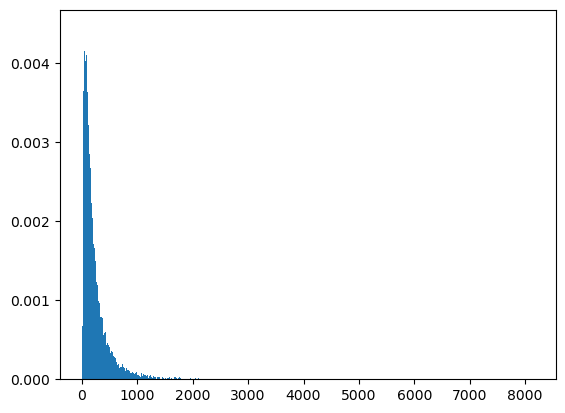

In [5]:
## create sums of two and three log normal random variates ssum2 = s1 + s2 and ssum3 = s1 + s2 + s3


mu1, sigma1 = 5., 1. # mean and standard deviation
s1 = np.random.lognormal(mu1, sigma1, 25000)

mu2, sigma2 = 5., 1. # mean and standard deviation
s2 = np.random.lognormal(mu2, sigma2, 25000)

mu3, sigma3 = 5., 1. # mean and standard deviation
s3 = np.random.lognormal(mu3, sigma3, 25000)

ssum2 = s1 + s2

ssum3 = s1 + s2 + s3

count, bins, ignored = plt.hist(s1, 1000, density=True, align='mid')



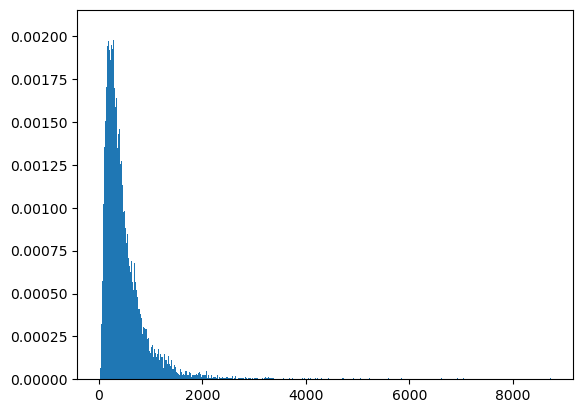

In [6]:
count, bins, ignored = plt.hist(ssum2, 1000, density=True, align='mid')

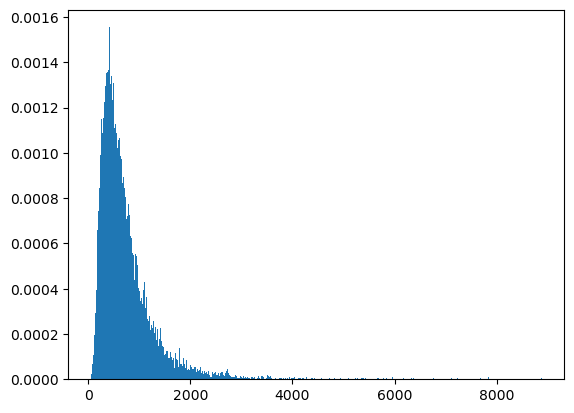

In [7]:
count, bins, ignored = plt.hist(ssum3, 1000, density=True, align='mid')

In [8]:
samp_mean2 = np.mean(s2)
pop_mean2 = np.exp(mu2+ (sigma2**2)/2)

pop_mean2, samp_mean2, mu2, sigma2

(244.69193226422038, 246.14131430477195, 5.0, 1.0)

In [9]:
def p_log_normal(x,μ,σ):
    p = 1 / (σ*x*np.sqrt(2*np.pi)) * np.exp(-1/2*((np.log(x) - μ)/σ)**2)
    return p

def pdf_seq(μ,σ,I,m):
    x = np.arange(1e-7,I,m)
    p_array = p_log_normal(x,μ,σ)
    p_array_norm = p_array/np.sum(p_array)
    return p_array,p_array_norm,x

In [10]:
p=15
I = 2**p # Truncation value
m = .1 # increment size


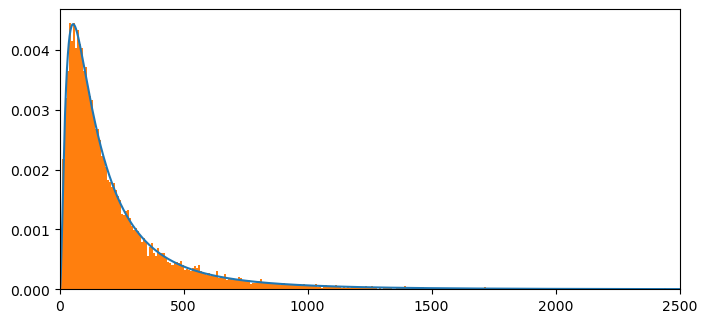

In [11]:
## Cell to check -- note what happens when don't normalize!
## things match up without adjustment. Compare with above

p1,p1_norm,x = pdf_seq(mu1,sigma1,I,m)
## compute number of points to evaluate the probability mass function
NT = x.size

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(x[:int(NT)],p1[:int(NT)],label = '')
plt.xlim(0,2500)
count, bins, ignored = plt.hist(s1, 1000, density=True, align='mid')

plt.show()

In [12]:
# Compute mean from discretized pdf and compare with the theoretical value

mean= np.sum(np.multiply(x[:NT],p1_norm[:NT]))
meantheory = np.exp(mu1+.5*sigma1**2)
mean, meantheory

(244.69059898302908, 244.69193226422038)

In [13]:

p1,p1_norm,x = pdf_seq(mu1,sigma1,I,m)
p2,p2_norm,x = pdf_seq(mu2,sigma2,I,m)
p3,p3_norm,x = pdf_seq(mu3,sigma3,I,m)

tic = time.perf_counter()

c1 = np.convolve(p1_norm,p2_norm)
c2 = np.convolve(c1,p3_norm)


toc = time.perf_counter()

tdiff1 = toc - tic

tic = time.perf_counter()

c1f = fftconvolve(p1_norm,p2_norm)
c2f = fftconvolve(c1f,p3_norm)
toc = time.perf_counter()

toc = time.perf_counter()

tdiff2 = toc - tic

print("time with np.convolve = ", tdiff1,  "; time with fftconvolve = ",  tdiff2)



time with np.convolve =  150.434048875 ; time with fftconvolve =  0.04493250000001581


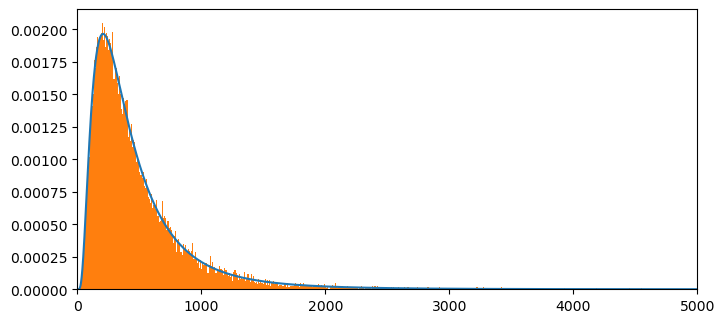

In [14]:
NT= np.size(x)

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(x[:int(NT)],c1f[:int(NT)]/m,label = '')
plt.xlim(0,5000)

count, bins, ignored = plt.hist(ssum2, 1000, density=True, align='mid')
# plt.plot(P2P3[:10000],label = 'FFT method',linestyle = '--')

plt.show()

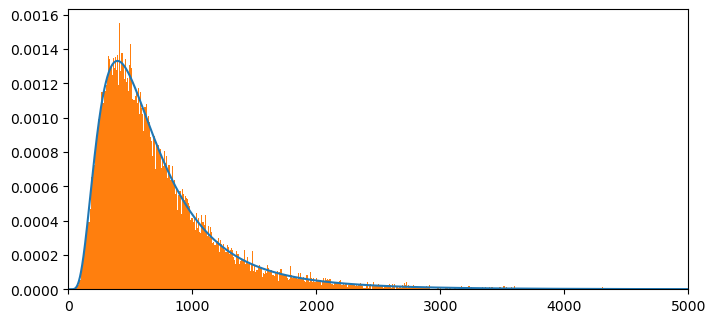

In [15]:
NT= np.size(x)
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(x[:int(NT)],c2f[:int(NT)]/m,label = '')
plt.xlim(0,5000)

count, bins, ignored = plt.hist(ssum3, 1000, density=True, align='mid')
# plt.plot(P2P3[:10000],label = 'FFT method',linestyle = '--')

plt.show()

In [16]:
## Let's compute the mean of the discretized pdf
mean= np.sum(np.multiply(x[:NT],c1f[:NT]))
# meantheory = np.exp(mu1+.5*sigma1**2)
mean, 2*meantheory

(489.3810974093853, 489.38386452844077)

In [17]:
## Let's compute the mean of the discretized pdf
mean= np.sum(np.multiply(x[:NT],c2f[:NT]))
# meantheory = np.exp(mu1+.5*sigma1**2)
mean, 3*meantheory

(734.0714863312277, 734.0757967926611)

In [18]:
mu1, sigma1 = 4.28, 1.1947
mu2, sigma2 = 3.39, 1.1947
mu3, sigma3 = 2.795, 1.1947
mu4, sigma4 = 2.717, 1.1947
mu5, sigma5 = 2.717, 1.1947
mu6, sigma6 = 1.444, 1.4632
mu7, sigma7 = -.040, 1.4632


In [19]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [20]:
p=15
I = 2**p # Truncation value
m =  .05 # increment size




p1,p1_norm,x = pdf_seq(mu1,sigma1,I,m)
p2,p2_norm,x = pdf_seq(mu2,sigma2,I,m)
p3,p3_norm,x = pdf_seq(mu3,sigma3,I,m)
p4,p4_norm,x = pdf_seq(mu4,sigma4,I,m)
p5,p5_norm,x = pdf_seq(mu5,sigma5,I,m)
p6,p6_norm,x = pdf_seq(mu6,sigma6,I,m)
p7,p7_norm,x = pdf_seq(mu7,sigma7,I,m)
p8,p8_norm,x = pdf_seq(mu7,sigma7,I,m)
p9,p9_norm,x = pdf_seq(mu7,sigma7,I,m)
p10,p10_norm,x = pdf_seq(mu7,sigma7,I,m)
p11,p11_norm,x = pdf_seq(mu7,sigma7,I,m)
p12,p12_norm,x = pdf_seq(mu7,sigma7,I,m)
p13,p13_norm,x = pdf_seq(mu7,sigma7,I,m)
p14,p14_norm,x = pdf_seq(mu7,sigma7,I,m)

tic = time.perf_counter()

c1 = fftconvolve(p1_norm,p2_norm)
c2 = fftconvolve(c1,p3_norm)
c3 = fftconvolve(c2,p4_norm)
c4 = fftconvolve(c3,p5_norm)
c5 = fftconvolve(c4,p6_norm)
c6 = fftconvolve(c5,p7_norm)
c7 = fftconvolve(c6,p8_norm)
c8 = fftconvolve(c7,p9_norm)
c9 = fftconvolve(c8,p10_norm)
c10 = fftconvolve(c9,p11_norm)
c11 = fftconvolve(c10,p12_norm)
c12 = fftconvolve(c11,p13_norm)
c13 = fftconvolve(c12,p14_norm)

toc = time.perf_counter()

tdiff13 = toc - tic

print("time for 13 convolutions = ", tdiff13)


time for 13 convolutions =  2.4119289580000043


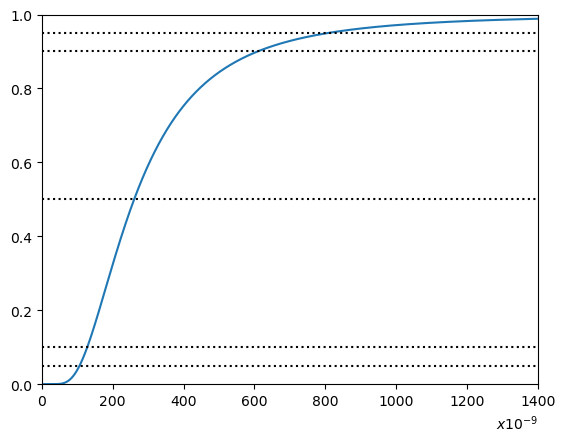

Percentile      x * 1e-9
------------  ----------
1%                 76.15
5%                106.5
10%               128.2
50%               260.55
66.5%             338.55
85%               509.4
90%               608.8
95%               807.6
99%              1470.2
99.78%           2474.85


In [21]:
d13 = np.cumsum(c13)
Nx=int(1400)
plt.figure()
plt.plot(x[0:int(Nx/m)],d13[0:int(Nx/m)])  # show Yad this -- I multiplied by m -- step size
plt.hlines(0.5,min(x),Nx,linestyles='dotted',colors = {'black'})
plt.hlines(0.9,min(x),Nx,linestyles='dotted',colors = {'black'})
plt.hlines(0.95,min(x),Nx,linestyles='dotted',colors = {'black'})
plt.hlines(0.1,min(x),Nx,linestyles='dotted',colors = {'black'})
plt.hlines(0.05,min(x),Nx,linestyles='dotted',colors = {'black'})
plt.ylim(0,1)
plt.xlim(0,Nx)
plt.xlabel("$x10^{-9}$",loc = "right")
plt.show()

x_1 = x[find_nearest(d13,0.01)]
x_5 = x[find_nearest(d13,0.05)]
x_10 = x[find_nearest(d13,0.1)]
x_50 = x[find_nearest(d13,0.50)]
x_66 = x[find_nearest(d13,0.665)]
x_85 = x[find_nearest(d13,0.85)]
x_90 = x[find_nearest(d13,0.90)]
x_95 = x[find_nearest(d13,0.95)]
x_99 = x[find_nearest(d13,0.99)]
x_9978 = x[find_nearest(d13,0.9978)]

print(tabulate([
    ['1%',f"{x_1}"],
    ['5%',f"{x_5}"],
    ['10%',f"{x_10}"],
    ['50%',f"{x_50}"],
    ['66.5%',f"{x_66}"],
    ['85%',f"{x_85}"],
    ['90%',f"{x_90}"],
    ['95%',f"{x_95}"],
    ['99%',f"{x_99}"],
    ['99.78%',f"{x_9978}"]],
    headers = ['Percentile', 'x * 1e-9']))